# Analysing topics with hSBM

In order to explore the content of the collected Wikipedia pages, we deploy a  hierarchical stochastic block model (hSBM). The model is used to identify prevalent topics in a text corpora, and it relies on integration of  teqniques used for community detection in networks (Gerlach et al. 2018). HSBM has proven to perform better than the more widely used latent Dirichlet allocation (LDA). Topics can be identified by the HSBM by representing the text corpora as a bipartite network in which nodes are documents and words, and the weight of the edges connecting nodes are determined by word-occurrences in each document. The model automatically detects the relevant number of topics and makes a hierarchical clustering of nodes (ibid.).

We were only able to run the hSBM in Google Colab. The code is attached and it can also be found through the link below. Through the hSBM we identifyied e list of topics and corresponding probabilities for each document to belong to a certain topic. We stored this information in a dataframe to be able to further analyse it in this notebook.

https://colab.research.google.com/drive/10_H2VPqhq69gVBz0nWEyC8aqVadAq9lc?usp=sharing

In [225]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import netwulf as nw
from IPython.display import Image

In [323]:
# We read the dataframes with data from HSBM 
topics=pd.read_csv('HSBM_topics_04.12.csv')
topics.drop('Unnamed: 0', axis = 'columns', inplace = True)
HSBM_probs=pd.read_csv('HSBM_probs_04.12.csv')
HSBM_probs.drop('Unnamed: 0', axis = 'columns', inplace = True)

**Plotting result of HSBM** <br>
We plot the word-document bipartite network generated thought hSBM. Document-nodes are on the left, and word-nodes are on the right. Colors correspond to the different groups. The nodes of words and documents are grouped on multiple levels.On the highest level (in the center of the graph) all nodes belong to the same group, on the second highest level the network is splot into word- and document-nodes. We are interested in the word-groups as these correspond to topics of the documents. The SBM has a hierarchical structure which implies that topics at the lowest levels (far to the right) contain more granular information about the content of the documents, whereas, topics at higher levels are clusters of the lower level topics and, thus, more aggregate (ref). 

The hSBM generates 397 topics at Level 0, 59 topics at Level 1, 11 topics at Level 2, 2 topics at Level 3, and 1 topic at Level 4. We choose to work with topics at level 1 which we deem to be the most appropriate level to examine as the topics appear to be reasonably coherent and manageable to manually select from. **A list of topics at all levels is attached in Appendix X.**

The documents on the left side are sorted such that the disciplines appear alphabethically such that anthropologists are the first nodes and the last are sociologists. The number of documents vary within each discipline, and thus we show the order in the table below. From the graph below we can sense how the document-nodes seem to cluster in what might correspond to disciplinary groupings. This is sespecially true for the cluster document nodes in the bottom which could indicate a sociology group.

In [324]:
# Showing the order and number of documents for each discipline as they appear in the graph below. 
pd.DataFrame(HSBM_probs.groupby(['discipline']).size())

0
discipline     
anth        149
eco         825
multiple     86
pol         233
psy         299
soc         513

                 Bipartite network of documents and words


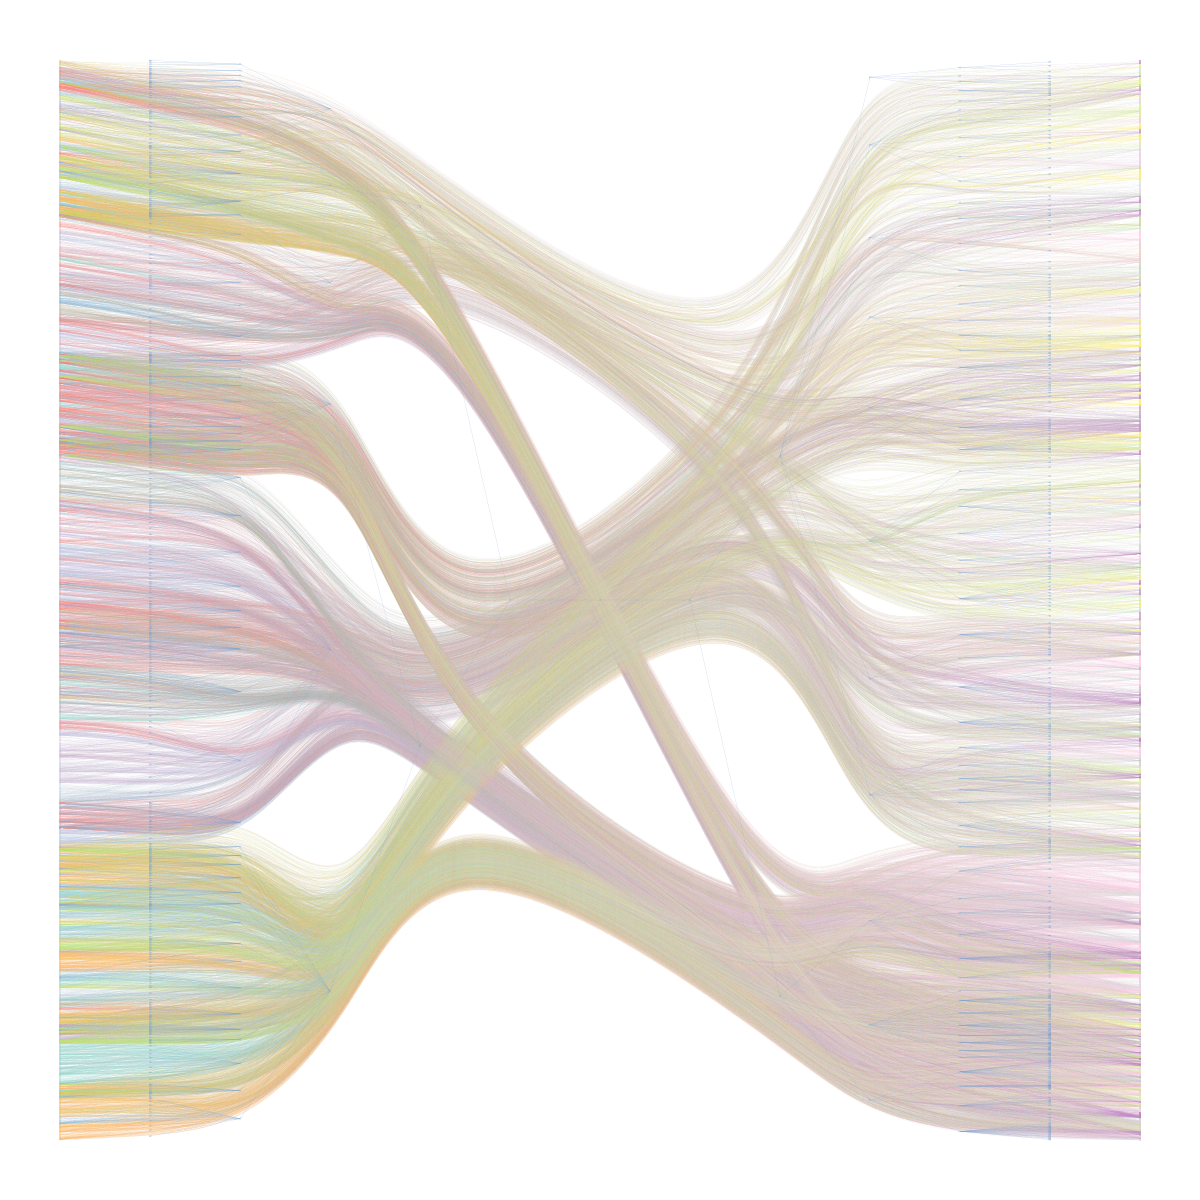

In [326]:
# We show the image of the bipartite network generated through th hSBM. 
print('                 Bipartite network of documents and words')
Image(filename = "hSBM_Topicmodel_04.12.png", width=600, height=600)


**Selecting relevant topics** <br>
The full list of topics generated at Level 1 appear in the dataframe below  

In [327]:
# Printing all rows in the dataframe of topics 
pd.set_option("display.max_rows", None, "display.max_columns", None)
topics

Topic      Topic_words  Probability_of_word_in_topic
0        0      information                      0.129238
1        0           health                      0.121458
2        0    communication                      0.093358
3        0          network                      0.087668
4        0              san                      0.045402
5        0        minnesota                      0.036925
6        0              van                      0.036345
7        0       evaluation                      0.021482
8        0        variation                      0.021017
9        0      minneapolis                      0.014166
10       1         analysis                      0.083767
11       1          student                      0.079832
12       1          process                      0.057623
13       1         approach                      0.052088
14       1           method                      0.050854
15       1        structure                      0.047552
16       1        scientist                      0.030446
17       1            focus                      0.029112
18       1         thinking                      0.025177
19       1          applied                      0.024610
20       2              one                      0.085910
21       2             many                      0.039139
22       2             much                      0.019716
23       2        according                      0.018976
24       2             like                      0.017177
25       2           become                      0.016922
26       2       considered                      0.015429
27       2          subject                      0.015352
28       2             took                      0.014867
29       2            point                      0.014523
30       3                –                      0.045171
31       3             time                      0.044816
32       3           became                      0.027293
33       3           family                      0.018998
34       3            wrote                      0.018604
35       3            known                      0.017647
36       3             well                      0.017392
37       3            early                      0.017361
38       3             part                      0.016936
39       3             view                      0.016898
40       4             1919                      0.030428
41       4             1920                      0.030428
42       4             1921                      0.025328
43       4             1912                      0.022777
44       4             1913                      0.022425
45       4             1915                      0.021282
46       4             1916                      0.019260
47       4             king                      0.015918
48       4             1902                      0.015478
49       4         commerce                      0.015038
50       5           member                      0.083111
51       5         national                      0.081484
52       5            board                      0.034424
53       5             free                      0.032492
54       5             june                      0.031856
55       5          january                      0.031246
56       5            april                      0.028907
57       5        committee                      0.026924
58       5         february                      0.026797
59       5            named                      0.023492
60       6            press                      0.117597
61       6             2006                      0.028340
62       6             2007                      0.027954
63       6             2004                      0.026683
64       6             2005                      0.026333
65       6             2011                      0.026296
66       6             2002                      0.023755
67       6             2012                      0.023405
68 

For each of the generated topics, we examine the 10 most probable words in order to select a subset of topics which we assess to be the most interesting to further examine. We draw on a heuristic approach which implies that we select topics that we assess to be semantically coherent and exclusive. Furthermore, we only select topics that we assess to be related to the content of the theoretical contributions of the researchers and we discard topics that appear to be related to academic prestige, timely relevans (topics consisting only of years e.g. Topic 6 and 4), and nationality (topics consisting of city names and words in non-English languages e.g. Topic 26 and 43). We select a subset of 21 topics which we assign appropriate descriptive names in the dictionary below.

In [337]:
#We create a dictionary with a number with the selected topic as key and value
topic_dict={'7':'Child/mother relations',
           '8':'Anthropology',
           '12':'State Administration',
           '14':'History and Society',
           '16':'Government Policy',
           '19':'Finance',
            '20':'Human Experience',
            '21':'World Order',
            '22':'Culture',
            '24':'Power relations',
            '25':'Effects and correlations',
            '27':'Philosophy',
            '34':'Religious Movements',
            '38':'Democratic Policy Making',
            '42':'Economics',
            '48':'Gender and Race',
            '49':'Sociology',
            '52':'Cognition',
            '55':'Government Systems',
            '56':'Market Mechanisms',
            '58':'Psychology'}

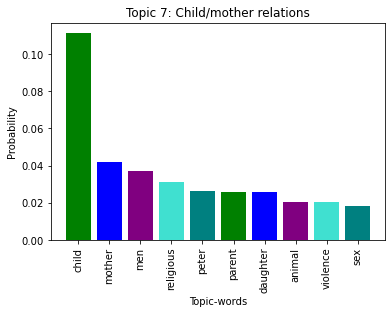

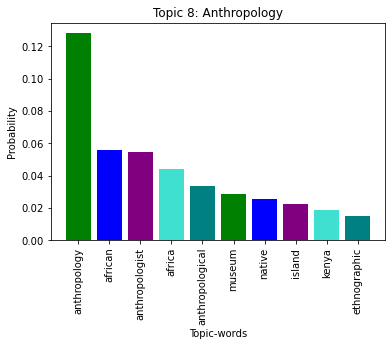

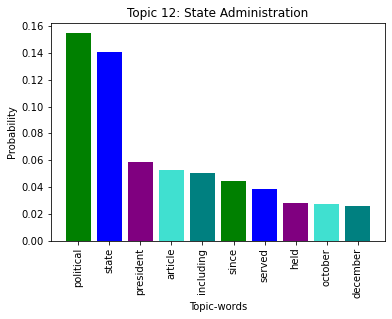

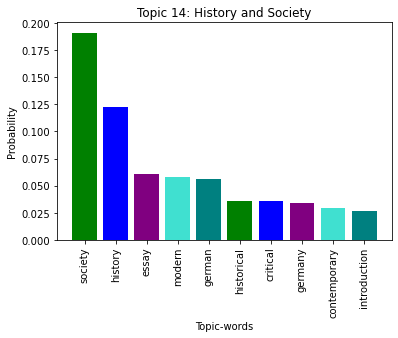

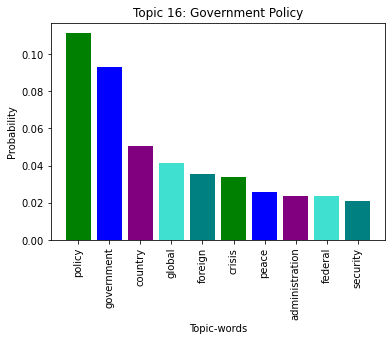

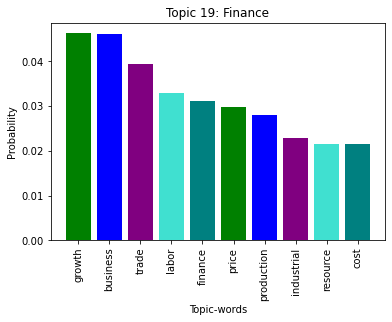

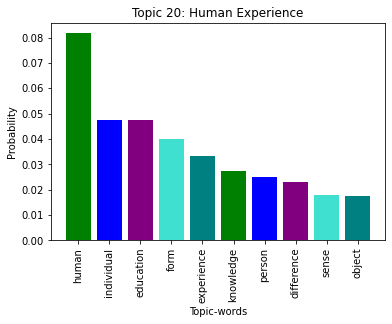

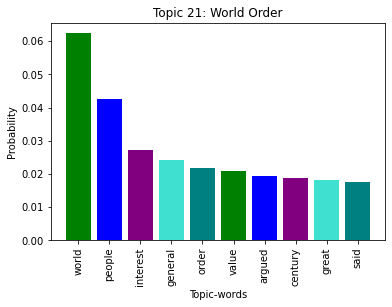

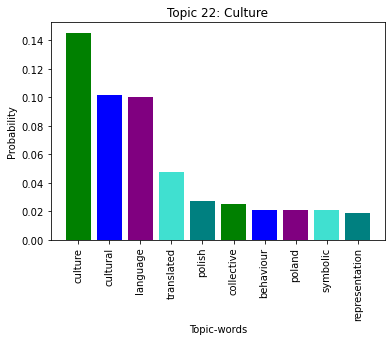

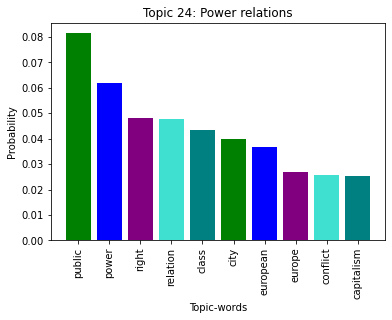

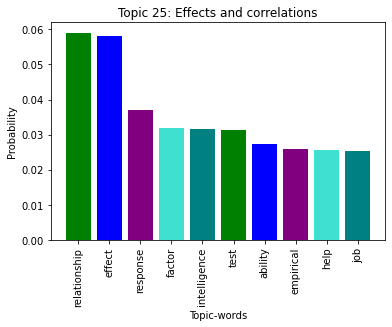

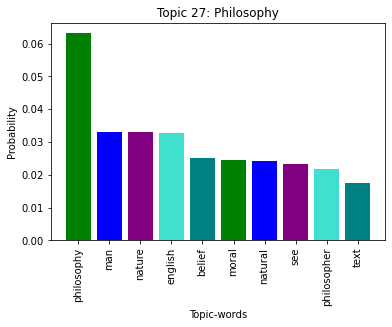

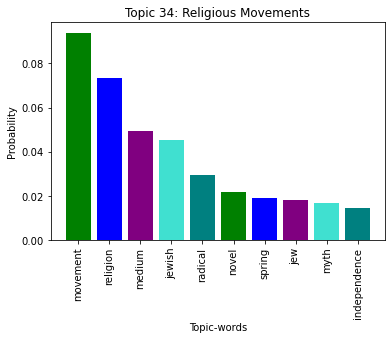

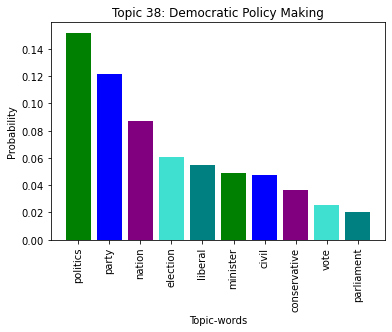

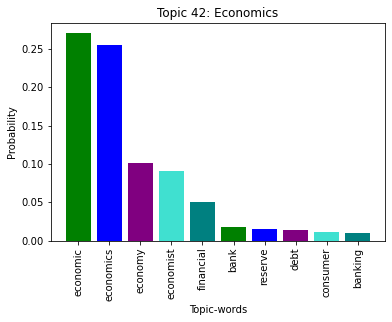

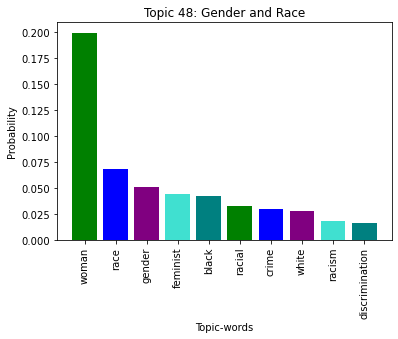

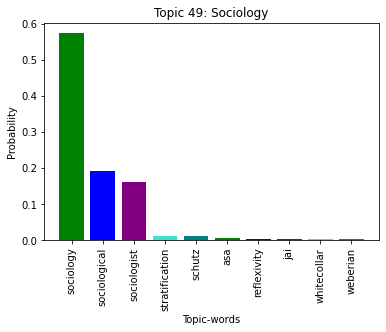

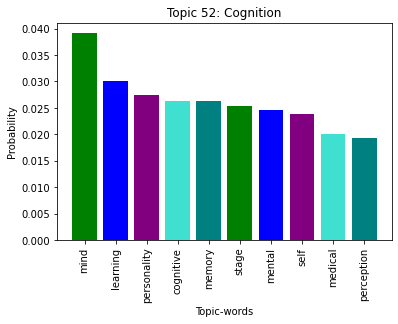

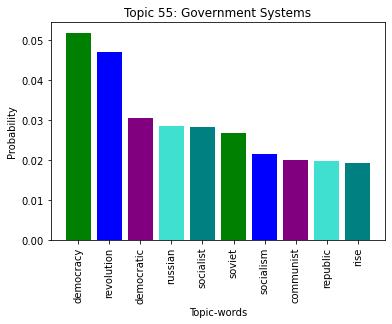

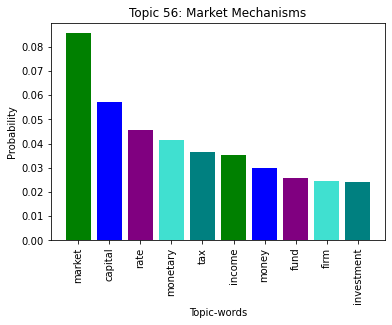

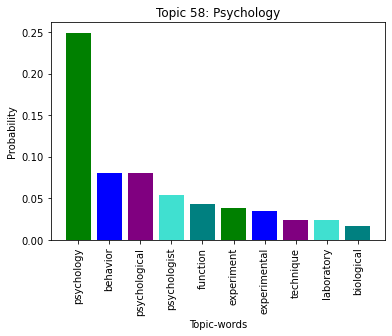

In [338]:
''' We create a barplot of the most important words within each of the selected topics '''

# We define the colors
color= ['green','blue','purple','turquoise','teal']

for i,t in topic_dict.items():
    
# We use the keys and values from the topic_dict to extract words and probabilities from the topic dataframe. 
# Words and word probabilities are then showed in a bar plot for each topic
    plt.bar(list(topics[topics['Topic']==int(i)]['Topic_words']),
            list(topics[topics['Topic']==int(i)]['Probability_of_word_in_topic']),color=color)
    plt.title('Topic {}: {}'.format(i,t))
    plt.xlabel('Topic-words')
    plt.ylabel('Probability')
    plt.xticks(rotation=90)
    plt.show()

# Topics within disciplines and communities 

**Examining distribution of topics by discipline** <br>
After having examined and selcted a subset of topics generated by the hSBM, we move on to find the distribution of each topic within the disciplines. By doing this, we want to find out whether the social scientists across different disciplines deal with the same topics or if their discipline bind them to certain topics. 

In [339]:
# We subset the dataframe of topic probabilities for each document to contain only the selected topics
HSBM_probs_topics=HSBM_probs[['name','discipline','community','text']+list(topic_dict.keys())]

# We rename the topics to the ascribed titles 
HSBM_probs_topics=HSBM_probs_topics.rename(columns=topic_dict)

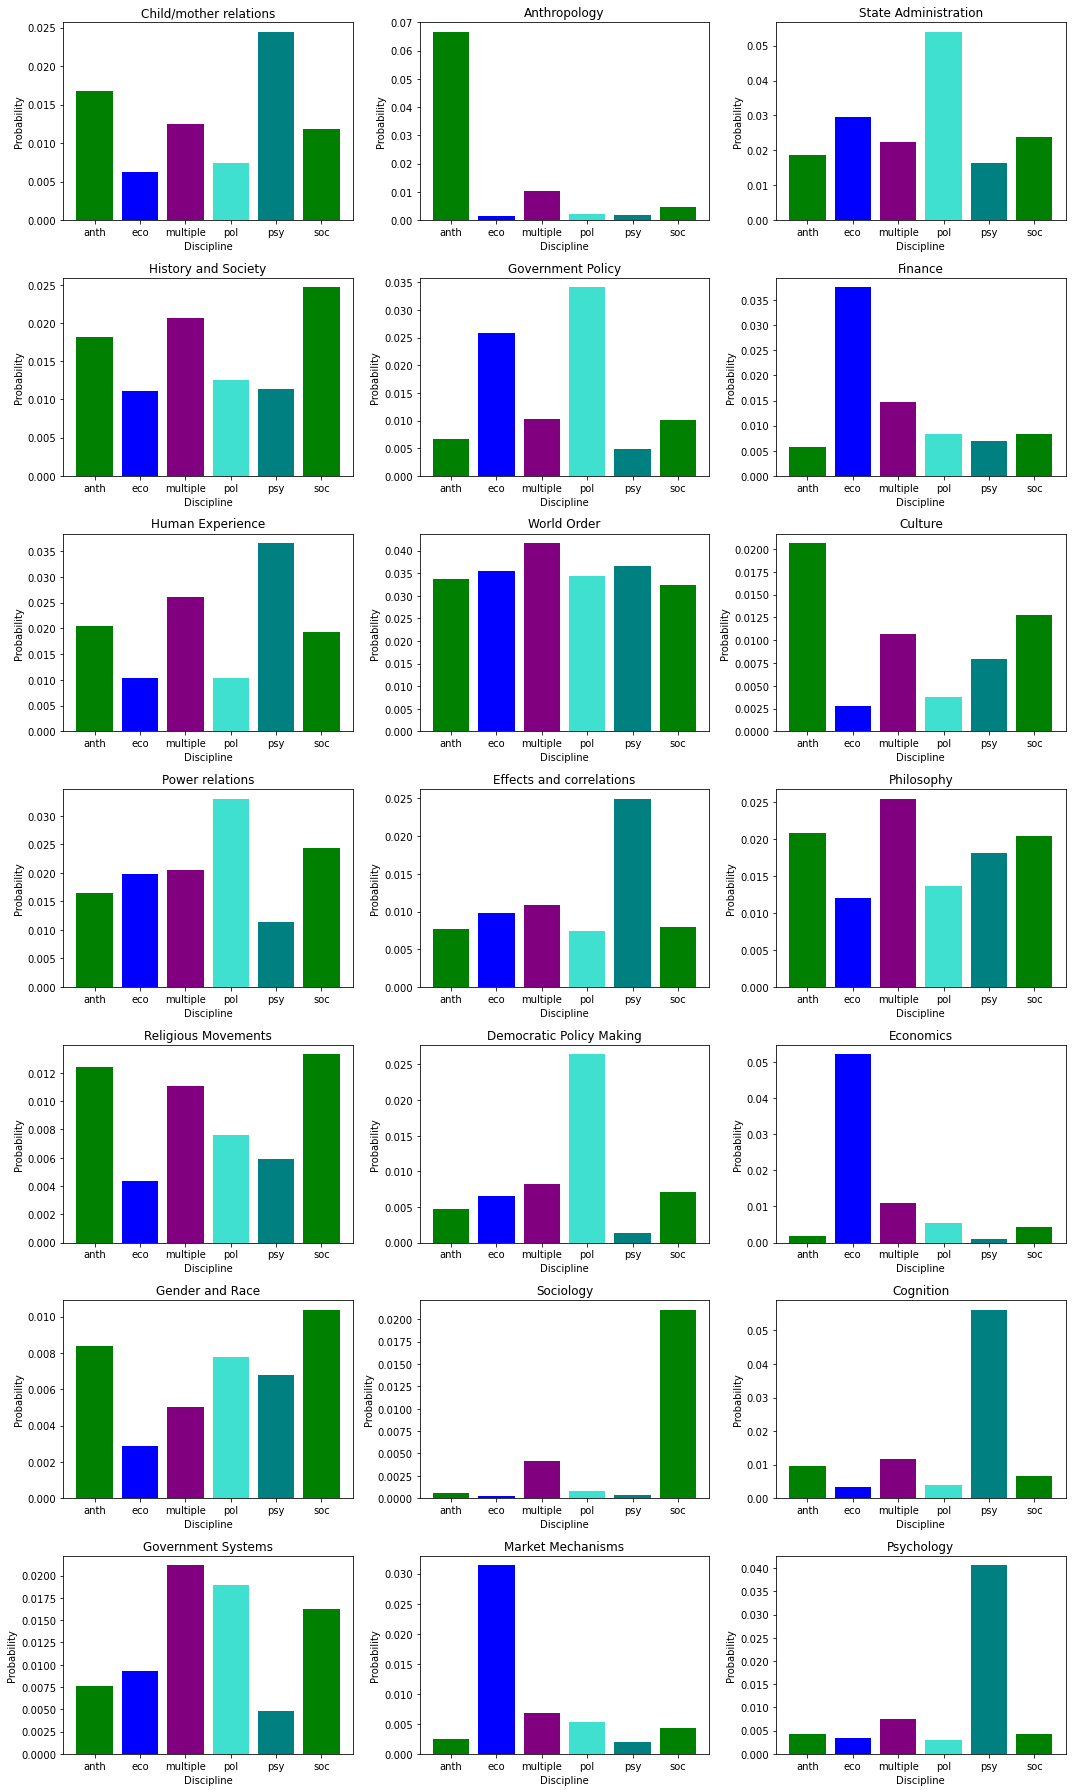

In [346]:
'''Showing distribution of topic for all disciplines'''

# We group all document by the disciplines, they belong to. 
HSBM_probs_discipline=HSBM_probs_topics.groupby('discipline',as_index=False).mean()

# We make subplots 
fig, ax = plt.subplots(7, 3, figsize=(15, 25))

# We loop over each topic 
for i,topic in enumerate(HSBM_probs_discipline.columns[2:]):
    if i<3:
        axis=ax[0,i]        
    if i>=3 and i<6:
        i = i-3
        axis=ax[1,i]
    if i>=6 and i<9:
        i = i-6
        axis=ax[2,i]
    if i>=9 and i<12:
        i=i-9
        axis=ax[3,i]        
    if i>=12 and i<15:
        i =i-12
        axis=ax[4,i]
    if i>=15 and i<18:
        i=i-15
        axis=ax[5,i]        
    if i>=18:
        i =i-18
        axis=ax[6,i]
        
    # Creating bar plot for each topic 
    axis.bar(HSBM_probs_discipline.discipline,HSBM_probs_discipline[topic],color=color)
    axis.set_title(topic)
    axis.set_xlabel('Discipline')
    axis.set_ylabel('Probability')
    fig.tight_layout()

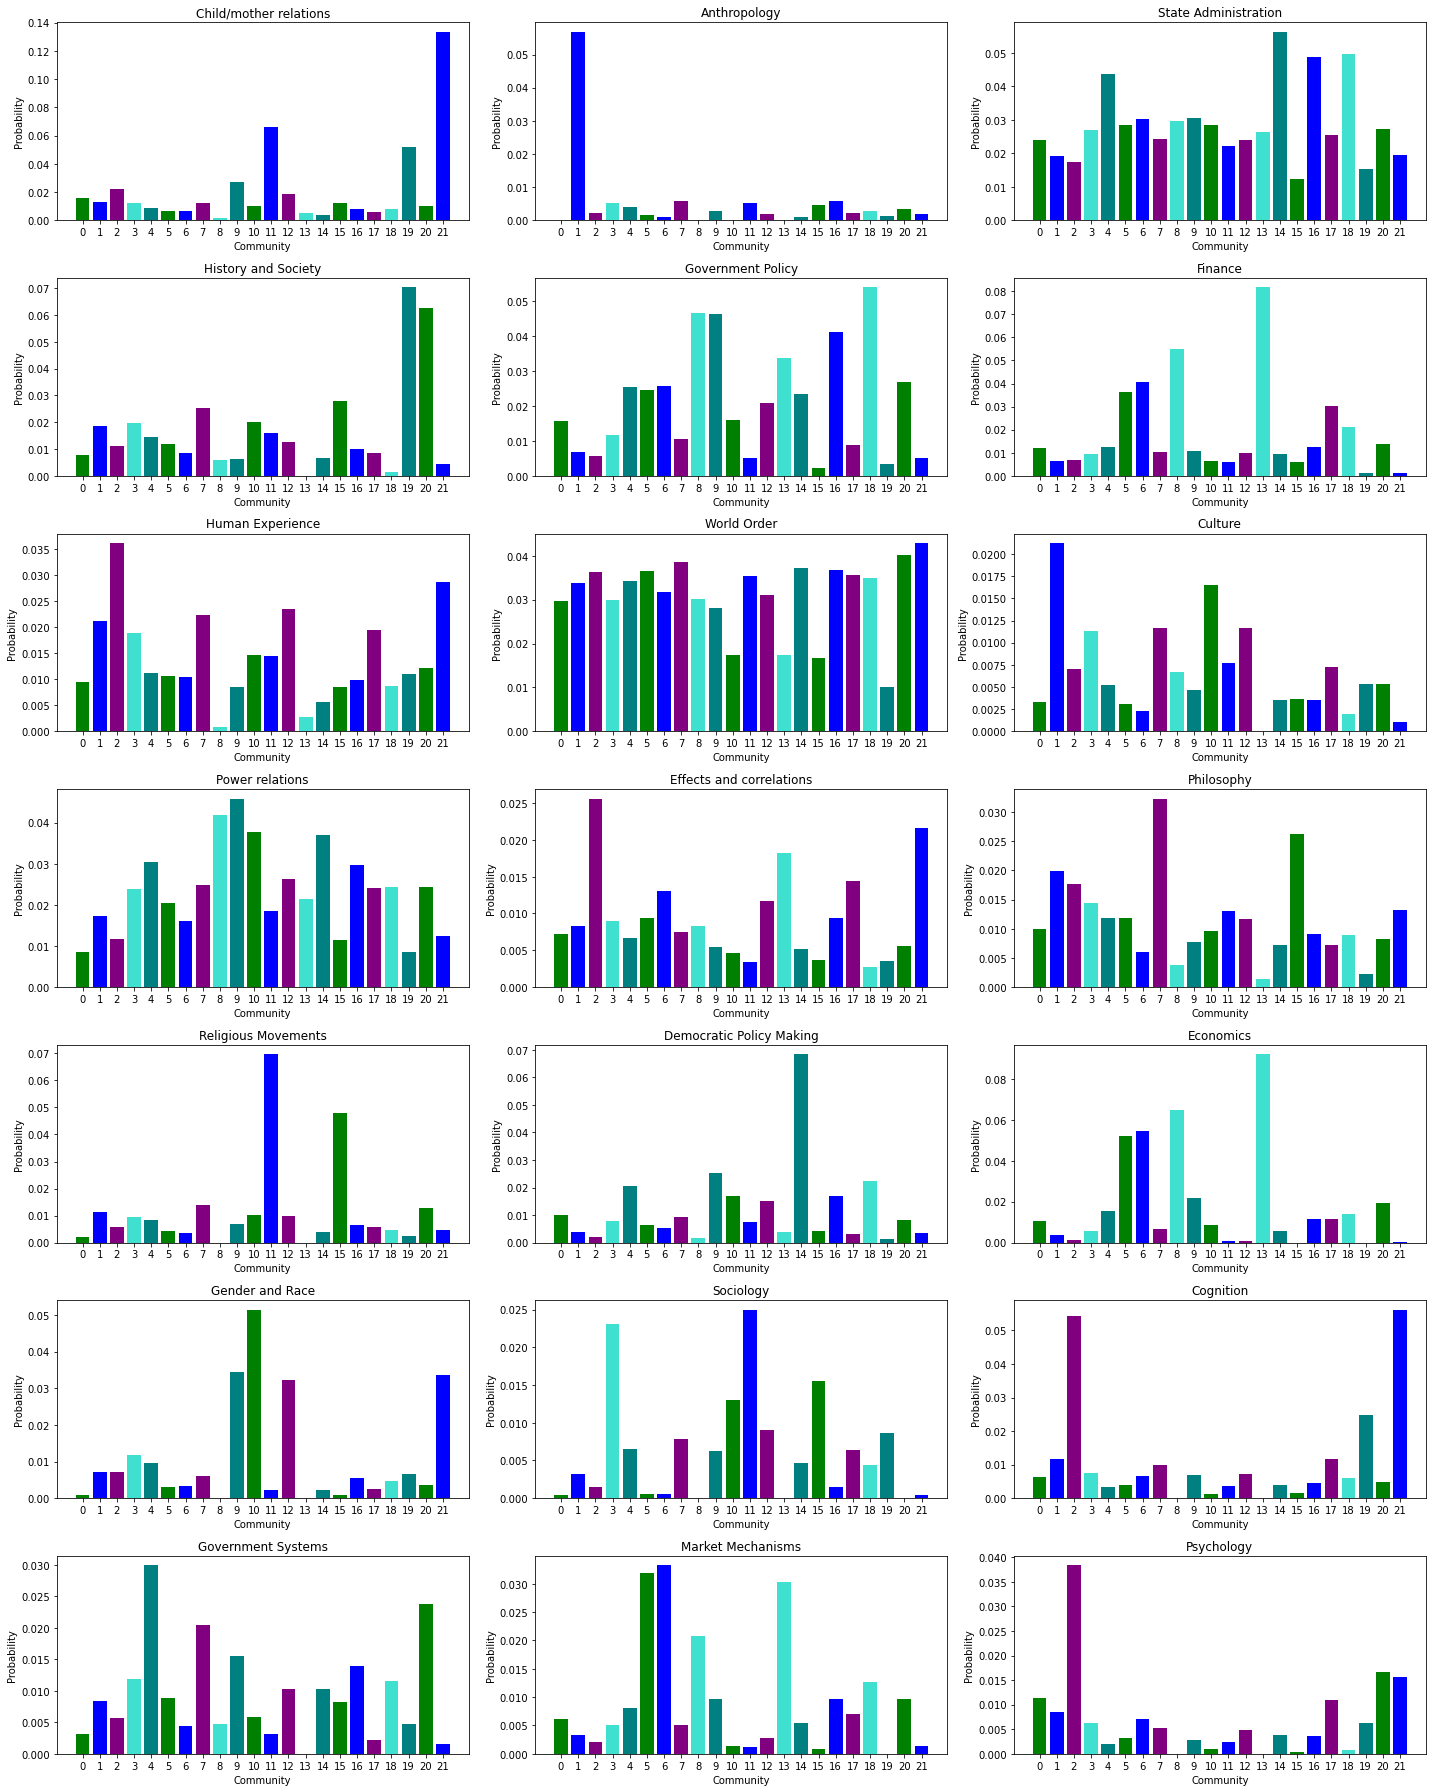

In [348]:
  '''Showing distribution of topic for all disciplines'''

# We group all document by the communities,we have identified. 
HSBM_probs_community=HSBM_probs_topics.groupby('community',as_index=False).mean()

# We make subplots 
fig, ax = plt.subplots(7, 3, figsize=(20,25))

# We loop over each topic 
for i,topic in enumerate(HSBM_probs_community.columns[1:]):
    if i<3:
        axis=ax[0,i]        
    if i>=3 and i<6:
        i = i-3
        axis=ax[1,i]
    if i>=6 and i<9:
        i = i-6
        axis=ax[2,i]
    if i>=9 and i<12:
        i=i-9
        axis=ax[3,i]        
    if i>=12 and i<15:
        i =i-12
        axis=ax[4,i]
    if i>=15 and i<18:
        i=i-15
        axis=ax[5,i]        
    if i>=18:
        i =i-18
        axis=ax[6,i]
        
        
    # Creating bar plot for each topic 
    axis.bar(HSBM_probs_community.community,HSBM_probs_community[topic],color=color)
    axis.set_title(topic)
    axis.set_xlabel('Community')
    axis.set_ylabel('Probability')
    axis.set_xticks(HSBM_probs_community.community)
    fig.tight_layout()

**[ Comments about the above ]**

Hostory and society is good for communities also mother/child. World order is interesting 

In [349]:
## Sofie kalder y noget andet senere ##
y = HSBM_probs_topics.set_index('name').to_dict()

In [350]:
nx.set_edge_attributes(G_bi, link_weights, name = "weight")

In [351]:
# get all topics and persons - the node in the bipartite network
all_topics = list(HSBM_probs_topics.columns)[4:]
all_pers = HSBM_probs_topics['name']
# Make list of link sets
link_set = [(pers, topic) for pers in all_pers for topic in all_topics if y[topic][pers]!=0]

# Dict with edge weights 
link_weights = {(pers, topic):y[topic][pers] for pers in all_pers for topic in all_topics if y[topic][pers]!=0}

# Create network
G_bi=nx.Graph()
G_bi.add_nodes_from(all_pers,bipartite=0)
G_bi.add_nodes_from(all_topics,bipartite=1)
G_bi.add_edges_from(link_set)

# #Set weights 
nx.set_edge_attributes(G_bi, link_weights, name = "weight")

# Node attributes
node_attr = {n:d["bipartite"] for n,d in G_bi.nodes(data=True)}
nx.set_node_attributes(G_bi, node_attr, name="group")

In [353]:
import json
with open('inv_science_name_dict.json', 'r') as f:
    inv_science_dict = json.load(f)

In [354]:
network, config = nw.visualize(G_bi, plot_in_cell_below=False)

In [355]:
''' Recolor nodes based on a partition dictionary and colormap 
    Only works if all nodes in nx_configs are in partition_dict as well '''
def redefine_attr(nx_configs, partition_dict, _cmap = plt.cm.Spectral_r):
    import copy
    import matplotlib

    _keys = set(partition_dict.values()) # the attribute classes
    n_keys = len(_keys) # how many are there? how many colors do we need?
    # assign each attribute class a unique value between 0 and 1
    # _num/(n_keys-1) --> standarize score with 0 and 1 as min and max
    attr_scale_dict = {_cat:_num/(n_keys-1) for _cat, _num in zip(_keys, range(n_keys))}
    
    # Copy dict - deep copy as the values are nested in a list
    new_nw = copy.deepcopy(nx_configs)
    
    for node_nr in range(len(nx_configs['nodes'])):
        node = network['nodes'][node_nr]['id'] # node id 
        attr = partition_dict[node] # get the attribute class of the node
        num_attr = attr_scale_dict[attr] # get the numerical 
        _cmap_color = _cmap(num_attr)
        # overwrite node color based on new attr
        new_nw['nodes'][node_nr]['color'] = matplotlib.colors.rgb2hex(_cmap_color) 
        
    return new_nw

In [307]:
ny = {n:attr['bipartite'] for n, attr in G_bi.nodes(data=True)}

In [358]:
config['node_stroke_width']=0

In [396]:
network,config= nw.visualize(G_bi, plot_in_cell_below=False,config=con)

In [394]:
con= {'zoom': 0.9,
 'node_charge': -45,
 'node_gravity': 0.8487806050868936,
 'link_distance': 15,
 'link_distance_variation': 0,
 'node_collision': True,
 'wiggle_nodes': False,
 'freeze_nodes': False,
 'node_fill_color': '#ffffff',
 'node_stroke_color': '#555555',
 'node_label_color': '#000000',
 'display_node_labels': False,
 'scale_node_size_by_strength': True,
 'node_size': 13.474511789464156,
 'node_stroke_width': 0,
 'node_size_variation': 0.3218667971578566,
 'link_color': '#7c7c7c',
 'link_width': 1.1428449012264663,
 'link_alpha': 0.5,
 'link_width_variation': 0.4261390636314265,
 'display_singleton_nodes': True,
 'min_link_weight_percentile': 0.8,
 'max_link_weight_percentile': 1}

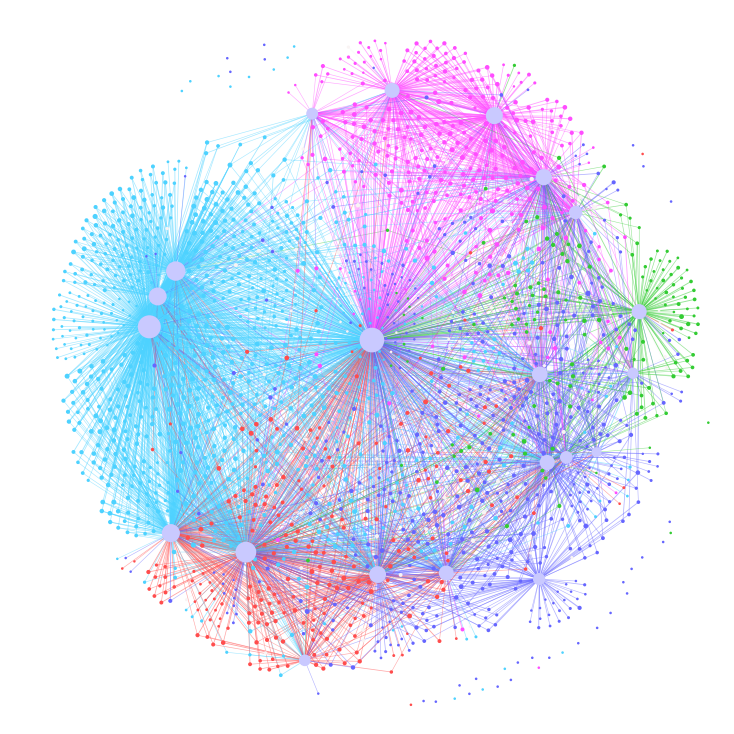

In [397]:
val_map = {'soc':"#6666ff",
           'anth':"#33cc33",
           'multiple':"#f9f4f4",
           'pol':"#ff4d4d",
           'psy': '#ff4dff',
           'eco': '#4dd2ff',
          'Topics':'#c9c9ff'}
        
for i in range(len(network['nodes'])-21):
    node=network['nodes'][i]['id']
    c = val_map[inv_science_dict[node]]
    network['nodes'][i].update({'color':c})

for i in range(len(network['nodes'])-21,len(network['nodes'])):
    node=network['nodes'][i]['id']
    c = val_map['Topics']
    network['nodes'][i].update({'color':c})
    
for _link in range(len(network['links'])):
    edge_couple = network['links'][_link] # select edge couple
    scientist = edge_couple['source'] # source should always be the scientist.
    c = val_map[inv_science_dict[scientist]] # 
    network['links'][_link].update({'color':c})
    
fig, ax = nw.draw_netwulf(network, figsize = 10)